# UFO predictions in the US

Dit Jupyter Notebook gaat ons vertellen over feiten en visualiseren van de UFO bezichtigingen en het 
inschatten van de volgende UFO bezichtiging. Een voorbeeld van zo'n visualisatie, zal als volgt eruit zien:

##### Geslacht ratio in Amerika:

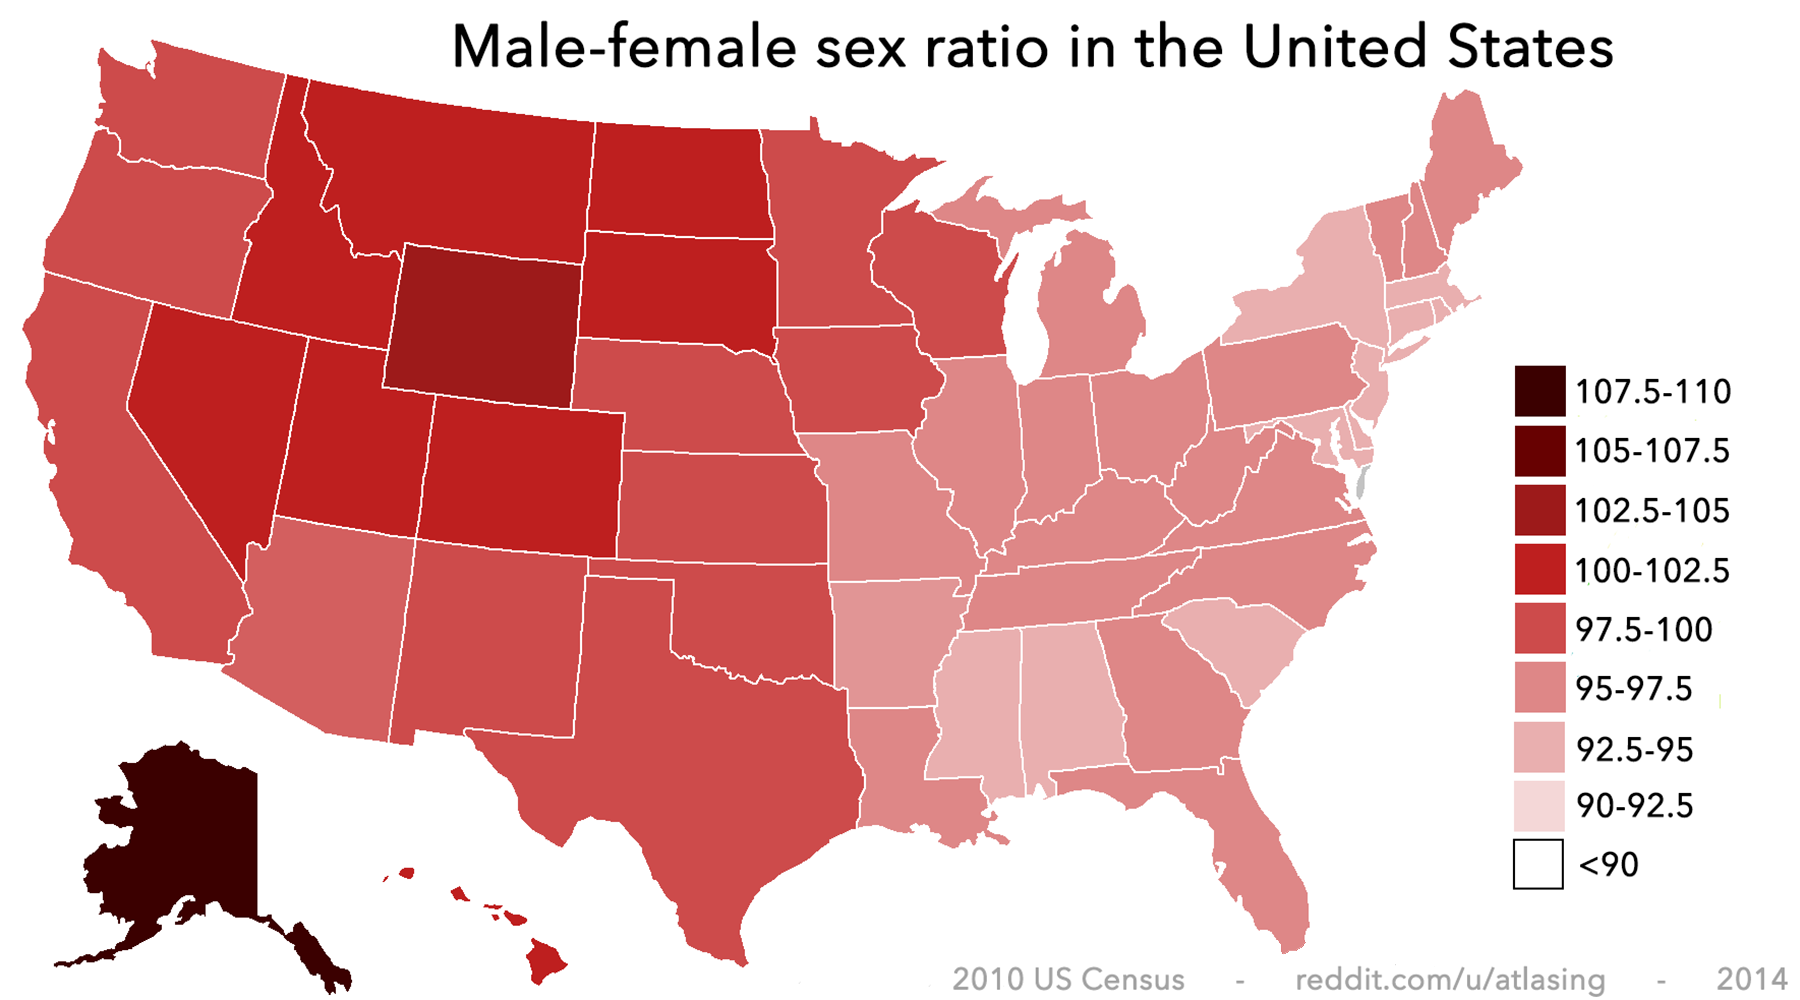

In [763]:
from IPython.display import Image
Image(filename='example_ratio.png') #bron: https://www.reddit.com/r/MapPorn/comments/21evhb/malefemale_sex_ratios_across_the_united_states/

### Table of contents: 
- Data Preparations
    * [Import Libraries](#import)
    * [Pandas Settings](#setting)
    * [UfoData Reading](#read)
- Data Usage
    * [Default Ufo Table](#def)
    * [Research Coordinates Ufo Table](#res_coord)
    * [Default Research Ufo Table](#res_def)
    * [Default Externe Dataset](#def_ext)
- Simplify Data
    * [Deleting duplicate data](#dup_delete)
- Visualisation   
    * [State Sightings](#state_sight)
    * [World Sightings](#world_sight)
- Prediction
    * [Former years table](#former_table)
    * [Last known sighting year prediction table](#predic_table)
- [Z_toets vraag](#z_toets)
- [Vragen](#vragen)

#### Import Libraries: <a class="anchor" id="import"></a>

In [764]:
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [765]:
states = geopandas.read_file('data/usa-states-census-2014.shp')

#### Pandas Settings <a class="anchor" id="setting"></a>

In [766]:
pd.set_option('display.max_colwidth',None)
pd.set_option('max_rows', 100)

#### Ufodata reading: <a class="anchor" id="read"></a>

In [767]:
read = pd.read_csv('ufo.csv', low_memory= False)
ufodata = pd.DataFrame(read) #Guy's benaming
ufo_data = pd.DataFrame(read) #Ruben's benaming
nondrop_ufo_data = ufo_data #ufo_data met nan's er nog in (voor z_toets)
ufo_data = ufo_data.dropna()

#####  Default Ufo table: <a class="anchor" id="def"></a>

In [768]:
indexNames = ufo_data[ ufo_data['shape'] == 'unknown' ].index
ufo_data.drop(indexNames , inplace=True) #delete unknown shapes
#------------
pd.set_option('display.max_colwidth', None) #increase comment column size
# -----------
default_ufo_information = ufo_data[['shape', 'city', 'country', 'datetime', 'comments']]
default_ufo_information #get only shape, city, country, datetime and comments

d:\users\ruben\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,shape,city,country,datetime,comments
0,cylinder,san marcos,us,10/10/1949 20:30,This event took place in early fall around 1949-50. It occurred after a Boy Scout meeting in the Baptist Church. The Baptist Church sit
3,circle,edna,us,10/10/1956 21:00,My older brother and twin sister were leaving the only Edna theater at about 9 PM&#44...we had our bikes and I took a different route home
4,light,kaneohe,us,10/10/1960 20:00,AS a Marine 1st Lt. flying an FJ4B fighter/attack aircraft on a solo night exercise&#44 I was at 50&#44000&#39 in a &quot;clean&quot; aircraft (no ordinan
5,sphere,bristol,us,10/10/1961 19:00,My father is now 89 my brother 52 the girl with us now 51 myself 49 and the other fellow which worked with my father if he&#39s still livi
7,disk,norwalk,us,10/10/1965 23:45,A bright orange color changing to reddish color disk/saucer was observed hovering above power transmission lines.
...,...,...,...,...,...
88674,other,napa,us,9/9/2013 22:00,Napa UFO&#44
88675,circle,vienna,us,9/9/2013 22:20,Saw a five gold lit cicular craft moving fastly from rght to left.
88676,cigar,edmond,us,9/9/2013 23:00,2 witnesses 2 miles apart&#44 Red &amp; White Elongated-Cigar Shaped Flashing lights&#44 NW of Oklahoma City
88677,diamond,starr,us,9/9/2013 23:00,On September ninth my wife and i noticed strange lights in the sky. Two white lights and a red light. I had noticed this the night befo


#####  Research Coordinates Ufo Table <a class="anchor" id="res_coord"></a>

In [769]:
# Get research Coordinates Ufo table
indexNames = ufo_data[ ufo_data['latitude'] == 'unknown' ].index
ufo_data.drop(indexNames , inplace=True) #delete unknown latitude
#------------
pd.set_option('display.max_colwidth', None) #increase comment column size
# -----------
default_coordinates_information = ufo_data[['latitude', 'longitude']]
default_coordinates_information = default_coordinates_information.dropna()
default_coordinates_information #get only shape, city, country, datetime and comments

d:\users\ruben\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,latitude,longitude
0,29.8830556,-97.941111
3,28.9783333,-96.645833
4,21.4180556,-157.803611
5,36.5950000,-82.188889
7,41.1175000,-73.408333
...,...,...
88674,38.2972222,-122.284444
88675,38.9011111,-77.265556
88676,35.6527778,-97.477778
88677,34.3769444,-82.695833


#####  Default Research Ufo table: <a class="anchor" id="res_def"></a>

In [770]:
# Get research Ufo table
indexNames = ufo_data[ ufo_data['shape'] == 'unknown' ].index
ufo_data.drop(indexNames , inplace=True) #delete unknown shapes
#------------
pd.set_option('display.max_colwidth', None) #increase comment column size
# -----------

default_ufo_information = ufo_data[['shape', 'latitude', 'longitude', 'datetime', 'duration (seconds)', 'duration (hours/min)']]
default_ufo_information #get only shape, city, country, datetime and comments

d:\users\ruben\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,shape,latitude,longitude,datetime,duration (seconds),duration (hours/min)
0,cylinder,29.8830556,-97.941111,10/10/1949 20:30,2700,45 minutes
3,circle,28.9783333,-96.645833,10/10/1956 21:00,20,1/2 hour
4,light,21.4180556,-157.803611,10/10/1960 20:00,900,15 minutes
5,sphere,36.5950000,-82.188889,10/10/1961 19:00,300,5 minutes
7,disk,41.1175000,-73.408333,10/10/1965 23:45,1200,20 minutes
...,...,...,...,...,...,...
88674,other,38.2972222,-122.284444,9/9/2013 22:00,1200,hour
88675,circle,38.9011111,-77.265556,9/9/2013 22:20,5,5 seconds
88676,cigar,35.6527778,-97.477778,9/9/2013 23:00,1020,17 minutes
88677,diamond,34.3769444,-82.695833,9/9/2013 23:00,0,2 nights


#####  Default Externe Dataset<a class="anchor" id="def_ext"></a>

In [771]:
read = pd.read_csv('nuforc_reports.csv')
ufodata2 = pd.DataFrame(read)
ufodata2 = ufodata2[['city', 'state', 'date_time', 'shape', 'duration']]
ufodata2 = ufodata2.dropna()
#----------
# for ind in ufodata2.index: 
#      print(ufodata2['duration'][ind])  
ufodata2

,city,state,date_time,shape,duration
0,Chester,VA,2019-12-12T18:43:00,light,5 seconds
1,Rocky Hill,CT,2019-03-22T18:30:00,circle,3-5 seconds
3,Ottawa,ON,2019-04-17T02:00:00,teardrop,10 seconds
4,Peoria,NY,2009-03-15T18:00:00,cigar,2 minutes
5,Kirbyville,TX,2019-04-02T20:25:00,disk,15 minutes
...,...,...,...,...,...
88120,Tempe,AZ,2019-10-02T20:00:00,formation,3 minutes
88121,Bolivar,MO,2019-10-02T20:00:00,light,20 seconds
88122,North Port,FL,2019-10-02T20:03:00,formation,20 seconds
88123,Black Mountain,NC,2019-10-02T22:00:00,fireball,2 minutes


#####  Deleting duplicate data <a class="anchor" id="dup_delete"></a>

In [772]:
firstdataset = ufodata
firstdataset = firstdataset.dropna()
#makes the firstdataset comparable with extern dataset:
firstdataset['state'] = firstdataset['state'].str.upper() 
firstdataset['city'] = firstdataset['city'].str.title() 
firstdataset = firstdataset.rename(columns={"datetime": "date_time"})

s=pd.concat([ufodata2, firstdataset],keys=[1,2]).drop_duplicates(['date_time', 'city'],keep='first') #delete duplicates
noclonedatasetextern =s.loc[1].dropna(axis=1)
noclonedatasetextern

d:\users\ruben\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
d:\users\ruben\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,city,state,date_time,shape,duration
0,Chester,VA,2019-12-12T18:43:00,light,5 seconds
1,Rocky Hill,CT,2019-03-22T18:30:00,circle,3-5 seconds
3,Ottawa,ON,2019-04-17T02:00:00,teardrop,10 seconds
4,Peoria,NY,2009-03-15T18:00:00,cigar,2 minutes
5,Kirbyville,TX,2019-04-02T20:25:00,disk,15 minutes
...,...,...,...,...,...
88120,Tempe,AZ,2019-10-02T20:00:00,formation,3 minutes
88121,Bolivar,MO,2019-10-02T20:00:00,light,20 seconds
88122,North Port,FL,2019-10-02T20:03:00,formation,20 seconds
88123,Black Mountain,NC,2019-10-02T22:00:00,fireball,2 minutes


#####  State Sight Countings <a class="anchor" id="state_sight"></a>

   STUSPS  sightings
0      CA      17951
1      FL       8849
2      WA       7416
3      TX       6790
4      NY       6260
5      PA       5306
6      AZ       5172
7      IL       4871
8      OH       4860
9      NC       4107
10     MI       3951
11     OR       3609
12     CO       3211
13     MO       3085
14     GA       2933
15     NJ       2925
16     VA       2915
17     MA       2880
18     ON       2708
19     IN       2693
20     WI       2660
21     SC       2518
22     TN       2478
23     MN       2281
24     CT       2088
25     MD       1972
26     KY       1849
27     NV       1724
28     NM       1670
29     OK       1567
30     UT       1498
31     AL       1473
32     IA       1416
33     ID       1280
34     KS       1272
35     ME       1242
36     LA       1223
37     AR       1211
38     NH       1178
39     BC       1162
40     MT       1072
41     WV        989
42     MS        821
43     NE        792
44     AK        704
45     HI        670
46     AB    

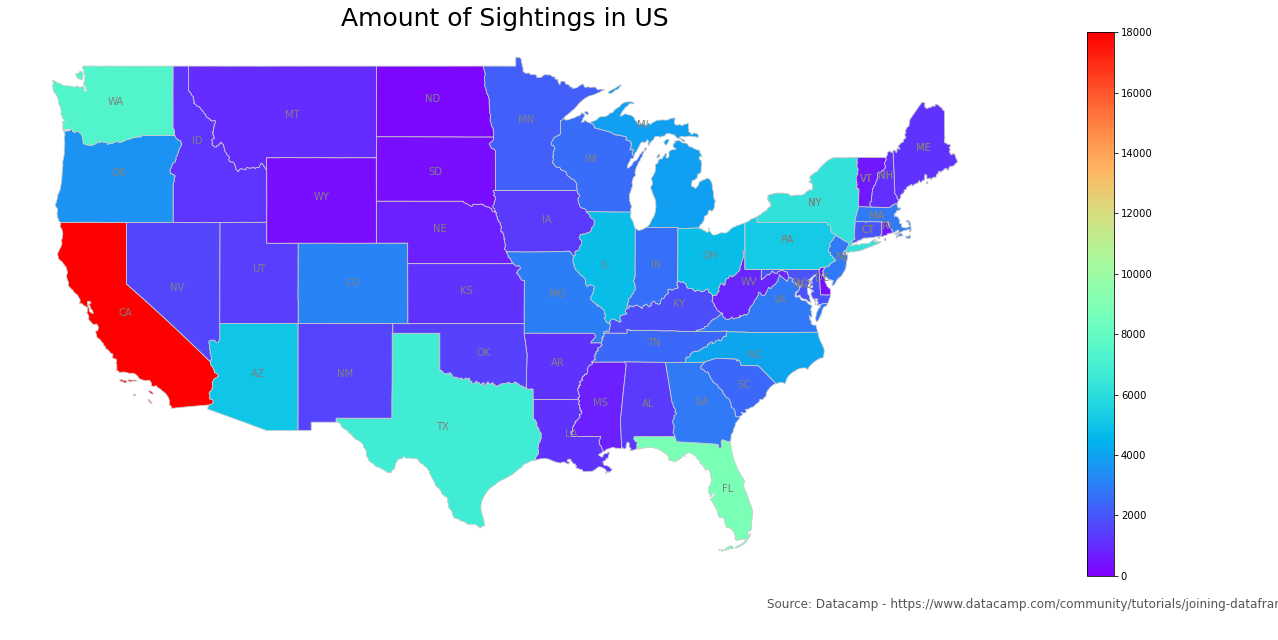

In [773]:
#makes both datasets have equal appellation and concatenate them and gives it the right appellation as well
onlystateextern = noclonedatasetextern[['state']]
onlystatefirst = firstdataset[['state']]
onlystatetotal = pd.concat([onlystateextern, onlystatefirst])
onlystatetotal.dropna()
countings = onlystatetotal['state'].value_counts()
countings = pd.DataFrame(countings)

countings = countings.reset_index() #thanks Mark
countings = countings.rename(columns={'index': 'STUSPS', 'state': 'sightings'})
countings = countings.dropna()
print(countings)
states = geopandas.read_file('data/usa-states-census-2014.shp')
states.head()

#merge the onlystatedataset with the US states dataset
states = states.to_crs("EPSG:3395")
plt.rcParams['figure.figsize'] = [50, 70] #height, width of the plot
merged = states.merge(countings, how='left', left_on="STUSPS", right_on="STUSPS")
merged.head()


# set the value column that will be visualised
variable = 'sightings'
# set the range for the choropleth values
vmin, vmax = 0, 18000
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))
# remove the axis
ax.axis('off')
# add a title and annotation
ax.set_title('Amount of Sightings in US', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source: Datacamp - https://www.datacamp.com/community/tutorials/joining-dataframes-pandas', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')
# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='rainbow', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it
# add the colorbar to the figure
fig.colorbar(sm)
# create map
merged.plot(column=variable, cmap='rainbow', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add Labels
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]
for idx, row in merged.iterrows():
    plt.annotate(s=row['STUSPS'], xy=row['coords'],horizontalalignment='center', color='gray')

#source: https://towardsdatascience.com/a-beginners-guide-to-create-a-cloropleth-map-in-python-using-geopandas-and-matplotlib-9cc4175ab630


#####  World sight Counting Points<a class="anchor" id="world_sight"></a>

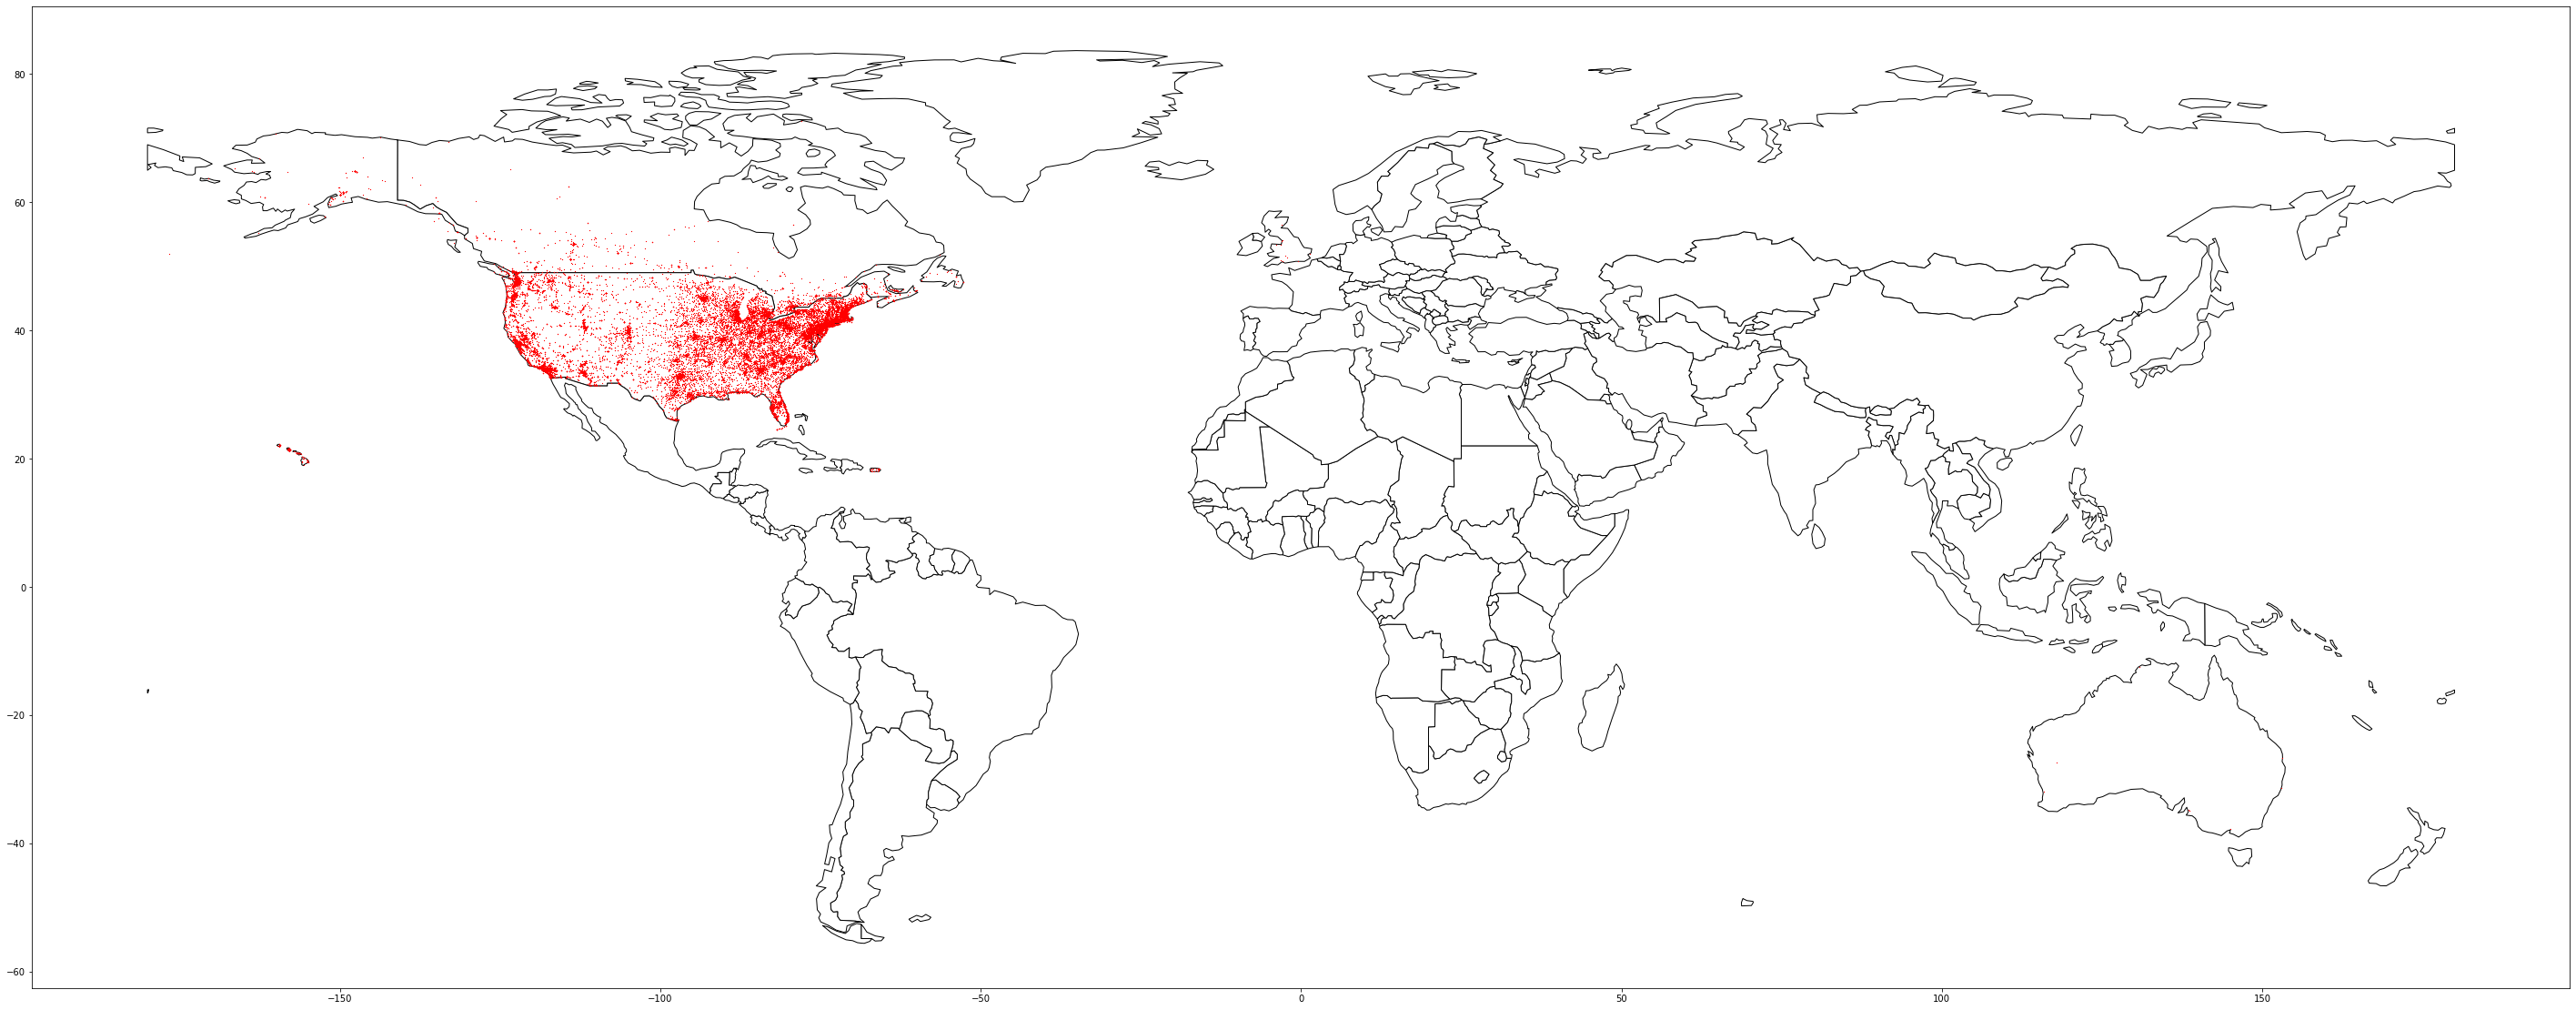

In [774]:
gdf = geopandas.GeoDataFrame(
    default_coordinates_information, geometry=geopandas.points_from_xy(default_ufo_information.longitude, default_ufo_information.latitude))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
base = world.plot(color='white', edgecolor='black')

gdf.plot(ax=base, marker='*', color='red', markersize=0.1);

#####  Former Years on 1 Example State Sightings Table in US<a class="anchor" id="former_table"></a>

In [775]:
date_state_extern = noclonedatasetextern[['state', 'date_time']]
date_state_extern['date_time'] = date_state_extern['date_time'].str[0:4] #only get year 

date_state_first = firstdataset[['state', 'date_time']]
date_state_first['date_time'] = date_state_first['date_time'].str[-10:-6] #only get year

date_state_total = pd.concat([date_state_first, date_state_extern]) #combine them
date_state_total = date_state_total.groupby('state') #group them on state


x = pd.DataFrame(date_state_total.get_group('NY')) #example

total_occurences = pd.DataFrame(x['date_time'].value_counts()) 
total_occurences = total_occurences.reset_index() #thanks Mark
total_occurences = total_occurences.sort_values(by='index', ascending=True)

#making of a viable dataframe
def viable_dataframe_maker (total_occurences):
    predict_dataframe = total_occurences.iloc[5:-1]
    predict_dataframe = predict_dataframe.rename(columns={"index": "year", "date_time": "target"})
    predict_dataframe.insert(1, "T_1", total_occurences['date_time'].shift(periods=1, axis='index'))
    predict_dataframe.insert(1, "T_2", total_occurences['date_time'].shift(periods=2, axis='index'))
    predict_dataframe.insert(1, "T_3", total_occurences['date_time'].shift(periods=3, axis='index'))
    predict_dataframe.insert(1, "T_4", total_occurences['date_time'].shift(periods=4, axis='index'))
    predict_dataframe.insert(1, "T_5", total_occurences['date_time'].shift(periods=5, axis='index'))
    return predict_dataframe

predict_dataframe = viable_dataframe_maker (total_occurences)
predict_dataframe

d:\users\ruben\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
d:\users\ruben\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,year,T_5,T_4,T_3,T_2,T_1,target
60,1952,1.0,3.0,1.0,1.0,1.0,3
59,1954,3.0,1.0,1.0,1.0,3.0,4
65,1955,1.0,1.0,1.0,3.0,4.0,2
66,1956,1.0,1.0,3.0,4.0,2.0,2
54,1957,1.0,3.0,4.0,2.0,2.0,6
61,1958,3.0,4.0,2.0,2.0,6.0,3
62,1959,4.0,2.0,2.0,6.0,3.0,3
57,1960,2.0,2.0,6.0,3.0,3.0,4
71,1961,2.0,6.0,3.0,3.0,4.0,1
56,1962,6.0,3.0,3.0,4.0,1.0,5


#####  Last known sightings Year prediction table<a class="anchor" id="predic_table"></a>

In [776]:
all_state_predictions = pd.DataFrame() #empty dataframe
temp_states_list = []#empty temporary dataframe
temp_pred_list = []#empty temporary dataframe
temp_act_list = []#empty temporary dataframe
temp_year_list = []#empty temporary dataframe

for name, group in date_state_total: 
    state_sightings = date_state_total.get_group(name)
    x = pd.DataFrame(date_state_total.get_group(name)) #example
    total_occurences = pd.DataFrame(x['date_time'].value_counts())
    total_occurences = total_occurences.reset_index() #thanks Mark
    
    total_occurences = total_occurences.sort_values(by='index', ascending=True)
    predict_dataframe = viable_dataframe_maker (total_occurences) #early used function
    try: #in case of unknown character value
        predict_dataframe['year'] = predict_dataframe.year.astype('int32')
        X_train = predict_dataframe.loc[predict_dataframe.year < predict_dataframe['year'].iloc[-1] ,['year', 'T_5', 'T_4', 'T_3', 'T_2', 'T_1'] ]
        y_train = predict_dataframe.loc[predict_dataframe.year < predict_dataframe['year'].iloc[-1] , ['target']]
        X_test = predict_dataframe.loc[predict_dataframe.year == predict_dataframe['year'].iloc[-1] , ['year', 'T_5', 'T_4', 'T_3', 'T_2', 'T_1'] ]
        y_test = predict_dataframe.loc[predict_dataframe.year == predict_dataframe['year'].iloc[-1] , ['target']]
        regressor = LinearRegression()
        regressor.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)
        df = pd.DataFrame({'State':name ,'tested': X_test['year'], 'Actual': y_test['target'], 'Predicted': y_pred[0][0]})
        temp_states_list.append(name)
        temp_pred_list.append(y_pred[0][0])
        temp_act_list.append(y_test['target'].values[0])
        temp_year_list.append(X_test['year'].values[0])
    except ValueError:
        continue
        
all_state_predictions['State']  = temp_states_list  
all_state_predictions['Predicted']  = temp_pred_list 
all_state_predictions['Actual']  = temp_act_list
all_state_predictions['On year']  = temp_year_list 

sqrt = np.sqrt(mean_squared_error(all_state_predictions['Predicted'], all_state_predictions['Actual']))
print('Gemiddelde error verschil is', sqrt) 

r2 = r2_score(all_state_predictions['Predicted'], all_state_predictions['Actual']) 
print('R^2 score  is', r2) 

all_state_predictions

Gemiddelde error verschil is 120.99808085725304
R^2 score  is 0.1971793692617979


,State,Predicted,Actual,On year
0,AB,41.518885,16,2018
1,AK,-10.358617,20,2018
2,AL,185.150041,26,2018
3,AR,70.762022,32,2018
4,AZ,258.749637,76,2018
5,BC,40.499064,8,2018
6,CA,531.846728,270,2018
7,CO,271.220707,94,2018
8,CT,153.814613,74,2018
9,DC,17.902658,2,2018


#####  Z-toets<a class="anchor" id="z_toets"></a>

In [777]:
international_visit = nondrop_ufo_data[['country', 'visit (seconds)']]
international_visit = international_visit.dropna()

international_visit_no_DE = international_visit[international_visit.country != 'de']
international_visit_no_DE

international_visit_only_DE = international_visit[international_visit.country == 'de']
international_visit_only_DE

DE_mean = international_visit_only_DE.mean()
INT_mean = international_visit_no_DE.mean()
print("Wereld gemiddelde: " + str(INT_mean))
print("Duitsland gemiddelde: " + str(DE_mean))

DE_STD = international_visit_only_DE.std()
print("Duitsland std: " + str(DE_STD))

Wereld gemiddelde: visit (seconds)    252.591323
dtype: float64
Duitsland gemiddelde: visit (seconds)    247.535714
dtype: float64
Duitsland std: visit (seconds)    45.912358
dtype: float64


In [778]:

z_score = (DE_mean - INT_mean) / DE_STD
p_values = stats.norm.sf(abs(z_score))
betrouwbaarheid = "{:.0%}".format(p_values[0]) 
betrouwbaarheid

'46%'

In [779]:
print('Conclusie: de betrouwbaarheid van de Duitsers is {}, wat geeft dat het niet toevallig gelijke ondervragende Duitsers zijn. Dus Duitsers kijken inderdaad minder op de UFO-website dan de rest van de wereld.'.format(betrouwbaarheid))

Conclusie: de betrouwbaarheid van de Duitsers is 46%, wat geeft dat het niet toevallig gelijke ondervragende Duitsers zijn. Dus Duitsers kijken inderdaad minder op de UFO-website dan de rest van de wereld.


# Vragen <a class="anchor" id="vragen"></a>